<h1>Importing libraries</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>***************************************</h1>

<h1>Bracketing search</h1>

<h4>Can stuck in local minima</h4>

The aim of bracketing search is to find a range within which the minimum is located.

first a range [x_min, x_max] along with an initial point x_init are specified. Also, we need a step determining how much
we should move (absolute value) and in what direction we should move (step sign). Also, in order to make the process of
finding the minimum faster, we can have a step_growth rate. It helps moving faster in a direction we believe the minimum
is at.

In [ ]:
def Bracketing(f, x_init, x_min, x_max,step = 1e-2, step_growth = 1.1, plotting_step = 0.01, 
               plot_function=True):
    """
    the aim is to find a<b<c such that f(a) > f(b) and f(b) < f(c)
    
    f:           univariate and unimodal function to be minimized.
    x_init       initial point of search.   
    x_min:       The beginning of the search interval.   
    x_max:       End of search interval.
    step:        The amount of movement in the optimal direction.
    step_growth: step size growth if the direction was optimum

    returns an interval in which the minimizer lies
    """
    
    a, fa = x_init, f(x_init)
    
    if a + step < x_min or a + step > x_max:
        step = -step
    
    b, fb = a + step, f(a + step)
    
    if plot_function:
        X = np.arange(x_min,x_max+plotting_step,plotting_step)
        plt.figure(figsize = (8,6), dpi = 100)
        plt.plot(X,list(map(f,X)))
        plt.title('Minimization with Bracketing method',fontname = 'Times New Roman', size = 20)
        plt.xlabel('X', size = 20, fontname = 'Times New Roman')
        plt.ylabel('f(x)', size = 20, fontname = 'Times New Roman')
    
    Sols = []
    Sols.append(x_init)
    while True:
        
        if fb > fa: # this means our direction was wrong as we have growth
            step = -step    # change the movement direction
            a, b = b, a     # change the beginning and end of the interval
            fa, fb = fb, fa # change the corresponding funciton values of beginning and end of the interval
        
        c, fc = b + step, f(b + step)
        
        if c > x_max or c < x_min:
            return (0,0) # the answer is not in [x_min, x_max]
        
        if plot_function:
            plt.scatter([a,b,c],[f(a),f(b),f(c)],c='r')
        
        if fb < fc: # reached to an interval => end and return the interval since there is a growth in c compared to be
            if a < c:
                return (a,c)
            else:
                return (c,a)
    
        a, b = b, c               # update a and b
        fa, fb = fb, fc           # update function values at a and b
        step = step * step_growth # increase the step size as you are moving in the correct direction

<h3>Using bracketing search</h3>

In [ ]:
f1 = lambda x: abs(x)
f2 = lambda x: x**2
f3 = lambda x: max(-x**3,x**2-150)

x_init = -4
min_, max_ = Bracketing(f2,x_init,x_min = -5, x_max = 3, step = 1e-2, step_growth = 1.1)

if min_ == max_ == 0:
    print('The solution is not in provided [x_min,x_max]')
    print('minimum value is found in either ends of the range.')
else:
    print(f'{(round(min_,3),round(max_,3))}')

<h1>***************************************</h1>

<h1>Fibonacci search</h1>

<h4>Can stuck in local minima</h4>

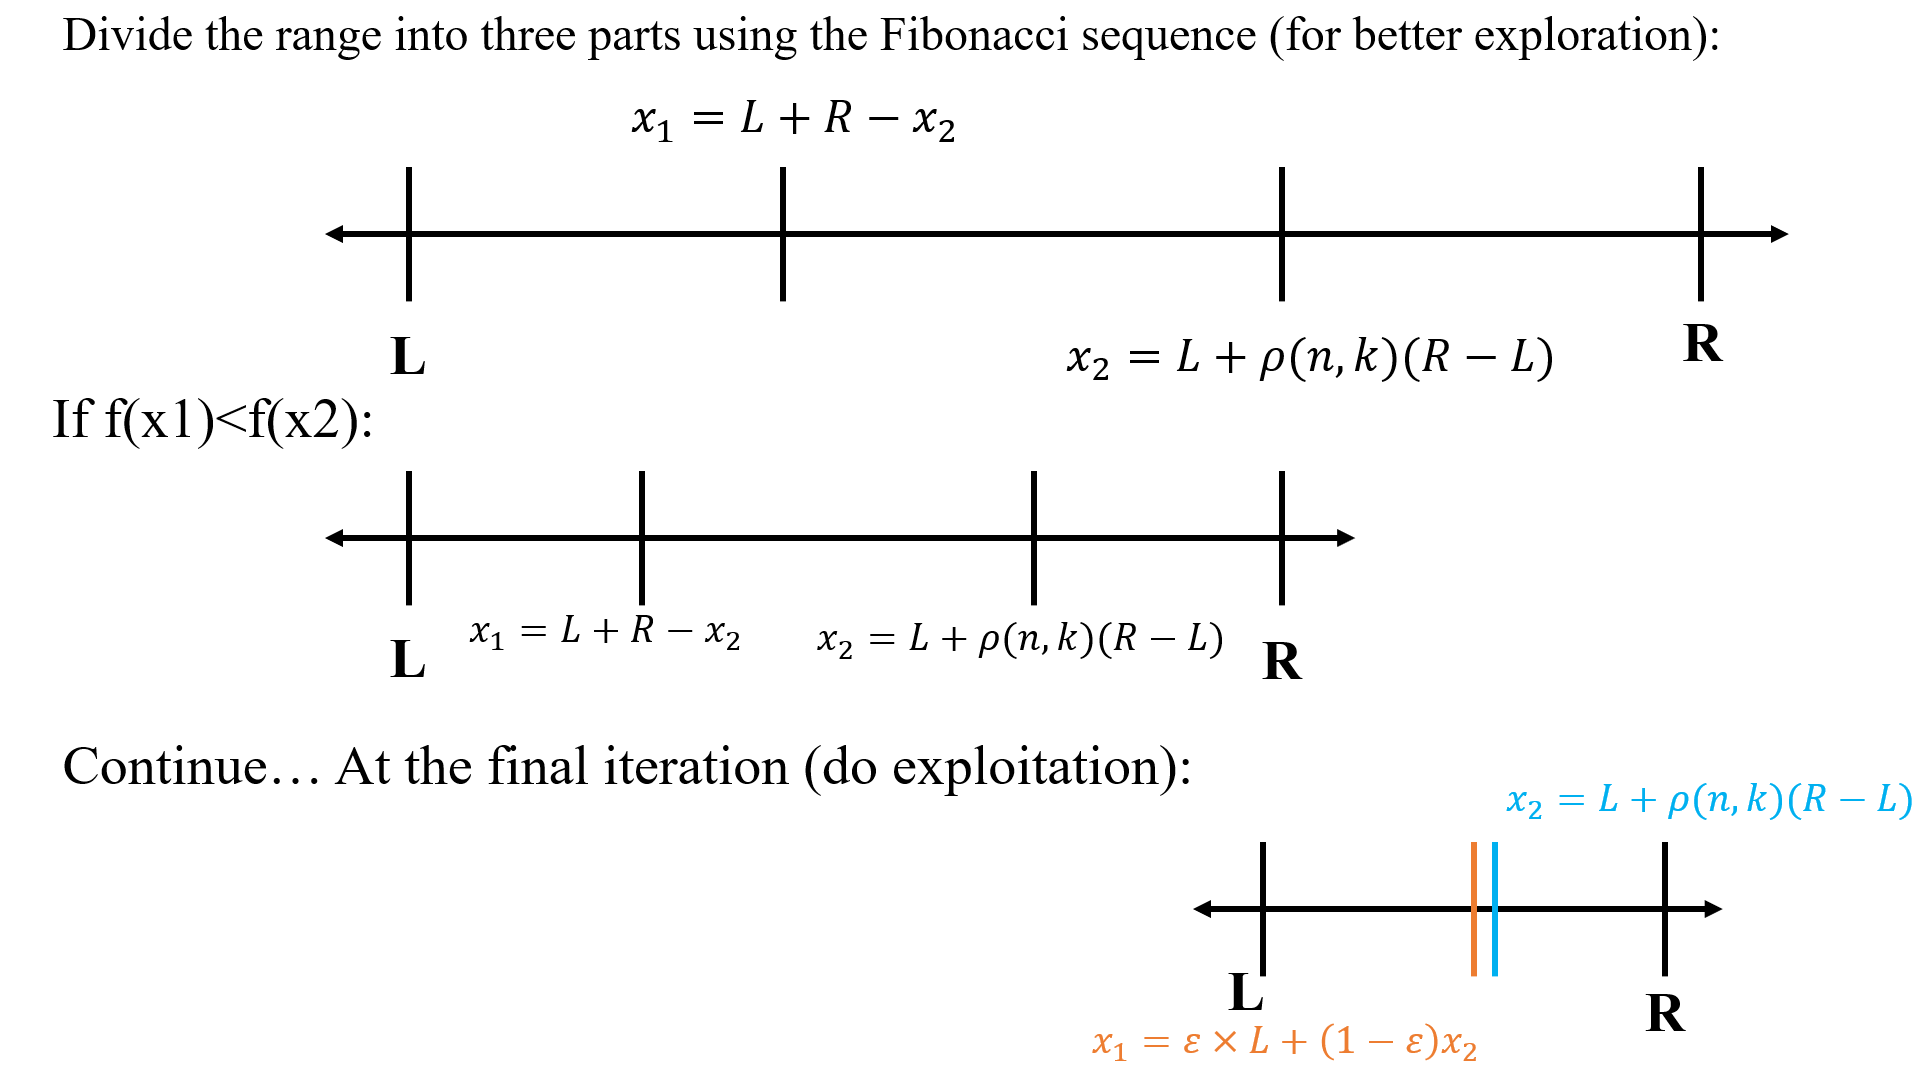

The algorithms attempts to break the search space into three parts and perform a more effective search in these parts.
It is executed for n iterations using n first terms of the fibonacci sequence. Ratio of two consecutive fibonacci term
determines how to divide the search space into three parts.

In [ ]:
def Fibonacci_Search(f,L,R,n,eps):

    '''
        n: number of iterations = number of fibonacci sequence numbers
        L: left hand side of the range
        R: right hand side of the range
        (L,R): search in this range
        eps: at the nth (final) iteration find new point using eps instead of fibonacci ratio
    '''

    def rho(n,k):
        '''
            rho(n,k) = Fibo(n-k)/Fibo(n-k+1)
            
            this is the ratio of nth fibonacci number to (n+1)th fibonacci number
            this formula is derived from closed form of the fibonacci sequence
            
            it is possible to generate n terms of the fibonacci sequence and manually 
            calculate the ratios but this is a better method
        '''
        
        phi = (1+5**0.5)/2  # a constant number known as the golden ratio 
        s = (1-5**0.5)/(1+5**0.5)
        
        return (1-s**(n-k+1)) / (phi*(1-s**(n-k+2)))

    for k in range(1, n +1): # for n iterations, k should start from 1 since we need it in rho
        
        x2 = L + rho(n,k) * (R-L) # find x2
        
        # find x1 using x2
        if k == n:
            '''
               at the final iteration, instead of using fibonacci ratios, 
               use epsilon to remove maximum part of the search space
            ''' 
            x1 = eps*L + (1-eps)*x2
        else:
            x1 = L + R - x2

        fx1, fx2 = f(x1), f(x2)

        if fx1 < fx2: # x1 is always on the left of x2 (x1<x2) so the right changes to x2
            # L = L (no change)
            R = x2
        else: # fx2 < fx1
            L = x1
            # R = R (no change)

    return (L,R)

<h3>Using Fibonacci search</h3>

In [ ]:
f = lambda x: x**4 - 14*x**3 + 60*x**2 - 70*x
L,R = 0,2
n = 6
eps=0.01

L_final,R_final = Fibonacci_Search(f,L,R,n,eps)

print(L_final,R_final)

plt.figure(figsize=(8,4))
x_plot = np.linspace(L,R,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(L_final, color = 'red', linestyle='--')
plt.axvline(R_final, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Golden section search</h1>

<h4>Can stuck in local minima</h4>

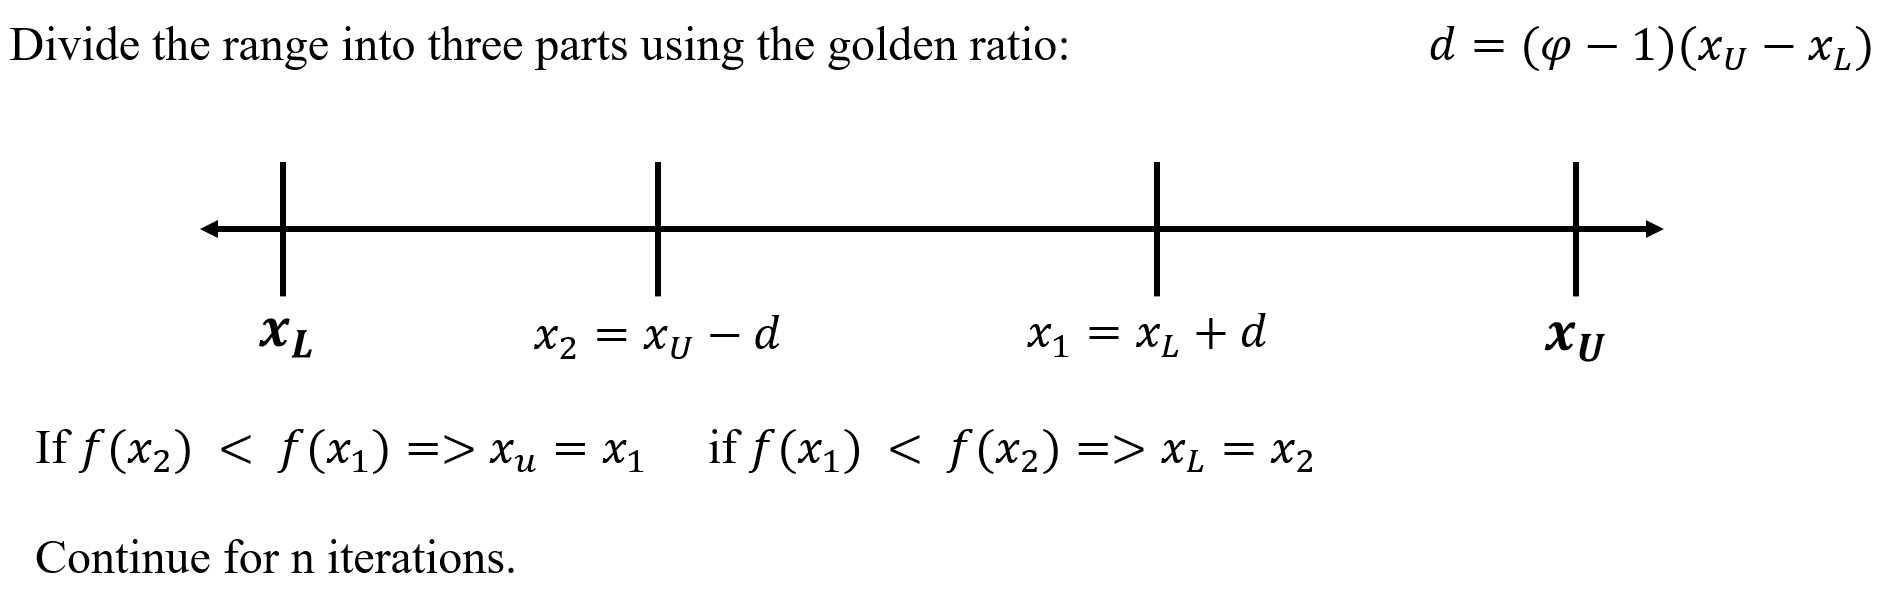

Golden section search uses the golden ratio (limit of fibonacci ratios or Fn+1/Fn when n goes to infinity) to divide the
search space into three parts. Since there is no fibonacci sequence, there is no limit on the number of iterations.

In [ ]:
def Golden_Section_Search(f, xL, xU, num_iter):
    
    phi = (5**0.5 + 1)/2
    for i in range(num_iter):
        d = (phi - 1)*(xU - xL)
        x1 = xL + d
        x2 = xU - d
        # always => xL < x2 < x1 < xU
        
        fx1, fx2 = f(x1), f(x2)
        
        if fx1 < fx2:
            # the answer is not less than x2 for sure so xL = x2
            xL = x2
        else:
            # fx1 > fx2 which means that the answer is not greater that x1 so xU = x1
            xU = x1
    
    return (xL,xU)

<h3>Using Golden section search</h3>

In [ ]:
f = lambda x: 0.1 * x**2 - 2 * np.sin(x)

xL = -10
xU = 10
num_iter = 10
xL_final, xU_final = Golden_Section_Search(f, xL, xU, num_iter)

print(xL_final,xU_final)

plt.figure(figsize=(8,4))
x_plot = np.linspace(xL,xU,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(xL_final, color = 'red', linestyle='--')
plt.axvline(xU_final, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Quadratic fit search</h1>

<h4>Can stuck in local minima</h4>

Quadratic fit search fits a surrogate quadratic model on (x,f(x)) points and finds the minimum point of the surrogate
(quadratic) function using df/dx=0. This point is used to update the xs and then a new quadratic function is fitted. The
process is repeated for n iterations or until the derivetive root becomes close enough to the middle value in x list.

In [ ]:
def Quadratic_Fit_Search(f,x,accuracy,plot_best_sols = True):
    """
        f:          the input function
        x:          list of three initial guesses
        accuracy:   the answer accuracy (the less, the more accurate)
    """
    Sols = []
    iteration = 0
    diff = 1
    while diff > accuracy:
    
        y = list(map(f,x))
        
        # fits a0 + a1 x1 + a2 x**2 to the (x,y) points
        # since there are anly three points and it is a quadratic function,
        # it will be a perfect fit with zero error
        Coefs = np.polynomial.polynomial.polyfit(x,y,deg = 2)
        
        # derivetive_root = -a1/(2*a2)
        Derivative_Root = -Coefs[1]/(2*Coefs[2])
        
        if Derivative_Root > x[1]:
            diff = abs(Derivative_Root-x[1])
            x = [x[1],Derivative_Root,x[2]]
        else:
            diff = abs(Derivative_Root-x[1])
            x = [x[0],Derivative_Root,x[1]]
        
        Sols.append(x[1])
        
        iteration += 1
    
    if plot_best_sols:
        plt.figure(figsize = (6,4), dpi = 120)
        plt.plot(range(iteration),list(map(f,Sols)))
        plt.title('Quadratic fit search',fontname = 'Times New Roman', size = 20)
        plt.xlabel('Iteration', size = 20, fontname = 'Times New Roman')
        plt.ylabel('Minimum', size = 20, fontname = 'Times New Roman')
    
    return x[1],f(x[1]),Sols

<h3>Using quadratic fit search</h3>

In [ ]:
f = lambda x: x**4 - 14*x**3 + 60*x**2 - 70*x
g = lambda x: 0.1 * x**2 - 2 * np.sin(x)

x = [0,1,2]
accuracy = 0.001
Minimizer, Minimum, Sols = Quadratic_Fit_Search(g,x,accuracy)

print(f'Minimizaer = {round(Minimizer,4)}')
print(f'Minimum = {round(Minimum,4)}')

plt.figure(figsize=(8,4))
x_plot = np.linspace(x[0],x[2],1000)
plt.plot(x_plot, g(x_plot))
plt.axvline(Minimizer, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Shubert-Piyavskii method</h1>

<h4>Finds global minima</h4>

In [ ]:
def subert_piyavskii(f,a,b,slope,tolerance, verbose=True):
    # this function is written for maximization. if you want to minimize f, maximize -f instead.

    # Initialization
    max_x_intersection = (a + b) / 2  # initial maximizer is assumed to be in the middle of the search space
    X = [a, b, max_x_intersection]  # Initial points: start, end, midpoint
    X.sort() # points should be sorted from start (smallest) to end (largest)

    error = float('inf')
    while error > tolerance:
        Maximizer_old = max_x_intersection
        max_y_intersection = float('-inf')

        fs = list(map(f,X))
        for i in range(1,len(X)): # repeat the process for every two xs inside the sorted list to find all intersections
            x_left, x_right = X[i - 1], X[i]
            f_left, f_right = fs[i-1], fs[i]
            
            # solve a system of two linear equations to find where two lines:
            # with +slope and (x_left,f_left)
            # with -slope and (x_right,f_right)
            # cross each other
            y = 0.5 * (f_left + f_right + slope * (x_right - x_left)) # intersection y value
            x = (y - f_left + slope * x_left) / slope # intersection x value

            if y > max_y_intersection: # if y is greater than previous max y values
                max_y_intersection = y # store it as the new max
                max_x_intersection = x # store its x value as well
        
        # difference between the intersection and actual function value
        error = abs( max_y_intersection - f(max_x_intersection) ) 
        
        if verbose:
            print('===============================')
            print(f'Error = {round( error ,5)}')
            print(f'Maximizer = {round(max_x_intersection,5)}')

        X.append(max_x_intersection)
        X = sorted(set(X))  # Use set to avoid duplicates
        
    return max_x_intersection, f(max_x_intersection)

<h3>using shubert-piyavskii method</h3>

In [ ]:
f = lambda x: -(x**4 - 4*x**3 - 30*x**2 - 50*x + 200) #-(0.1 * x**2 - 2 * np.sin(x))

a, b = -5, 7 # search space
slope = 300  # Lipschitz constant (slope of lines used to find intersections)
tolerance = 0.05  # Convergence threshold

maximizer, maximum = subert_piyavskii(f,a,b,slope,tolerance, verbose=False)

print(f'maximum value = {round(maximum,4)}')
print(f'maximizer value = {round(maximizer,4)}')

plt.figure(figsize=(8,4))
x_plot = np.linspace(a,b,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(maximizer, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Gradient descent</h1>

<h4>Can stuck in local minima</h4>

In [ ]:
def gradient_descent(func,gradient_func,x_init,step_size,esp, decay_rate, max_iter, verbose= True):
    
    # set decay_rate to None if you want to use a constant step_size
    
    funcs = []
    x = x_init
    funcs.append(func(x))
    diff = np.inf
    iteration = 0
    while diff > esp:
        
        if iteration == max_iter:
            break
        iteration += 1
        
        y1 = func(x)
        x = x - step_size*gradient_func(x)
        y2 = func(x)
        diff = abs(y1-y2)
        funcs.append(y2)
        
        if decay_rate:
            step_size = step_size * decay_rate
        
        if verbose:
            print(f'Difference = {diff} | x = {x}')
            
    return x, funcs

<h3>using gradient descent method</h3>

In [ ]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
                     2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])

x_init = [1,1]
step_size = 0.05
esp = 1e-6
decay_rate = 0.999
max_iter = 200
minimizer, funcs = gradient_descent(func,gradient_func,x_init,step_size,esp, decay_rate, max_iter, verbose= False)

print(f'Minimizer = {minimizer}')
print(f'minimum = {func(minimizer)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent | num iterations: {len(funcs)}')
plt.grid()

<h1>***************************************</h1>

<h2>Gradient descent with optimum step size</h2>

This algorithm uses Quadratic fir search to find an optimum step size such that the new x minimizes f(x) in the provided direction. In previous methods we used a constant or decaying step size to minimize x but here we are trying to find the best step size.

The problem of finding the best step size is a univariate optimization that can be solved using numerical methods like quadratic fit search, golden section search, shubert-piyavskii, or even another gradient descent using numerical approaximation of the derivetive. This implementation uses numerical methods.

In [ ]:
def gradient_descent_with_opt_step_size(func, gradient_func, x_init, eps,max_iter, step_opt_alg="QFS", verbose= True):
    # range of search for step size is considered to be between 0 and 1
    
    def func_step_size(step_size):
        return func(x - step_size * direction)
    
    funcs = []
    x = x_init
    funcs.append(func(x))
    diff = np.inf
    
    if verbose:
        print(f'Difference = {diff} | x = {x}')
    
    iteration = 0
    while diff > eps:
        
        if iteration == max_iter:
            break
        iteration += 1
        
        y1 = func(x)
        
        ############## Main algorithm
        
        direction = gradient_func(x) # find the direction of movement
        
        # find the best step size to move in the specified direction
        
        if step_opt_alg == "QFS":
        
            opt_step_size, _, _ = Quadratic_Fit_Search(func_step_size,x=[0,0.5,1],accuracy=0.0001,
                                                       plot_best_sols = False)
        elif step_opt_alg == "GSS":
        
            xL_final, xU_final = Golden_Section_Search(func_step_size, xL = 0, xU = 1, num_iter = 100)
            opt_step_size = (xL_final + xU_final) / 2
        
        x = x - opt_step_size * direction # find new x value using the best step size and direction
        
        ##############
        
        y2 = func(x)
        funcs.append(y2)
        
        diff = abs(y1-y2)
        
        if verbose:
            print(f'Difference = {diff} | x = {x}')
    
    return x, funcs

<h3>using gradient descent with optimum step size method</h3>

As can be seen there is no need to initialize the step size and the optimum x is found using less gradient descent iterations which proves the effectiveness of this method.

In [ ]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
                     2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])

x_init = [5,4]
eps = 1e-6
max_iter = 200
minimizer, funcs = gradient_descent_with_opt_step_size(func, gradient_func, x_init, eps, 
                                                       max_iter, step_opt_alg="QFS", verbose= True)

print(f'Minimizer = {minimizer}')
print(f'minimum = {func(minimizer)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with optimum step size | num iterations: {len(funcs)-1}') # minus 1 to exclude initial point
plt.grid()

<h1>***************************************</h1>

<h2>Hyper-gradient descent</h2>

Note that this method is more sensitive to step_size, mu, and x_init specially for high order functions which might have very steep gradients. So if you encountered numerical overflow try reducing step_size_init and mu; Also, change x_init. I personally prefer gradient_descent_with_opt_step_size function over this one. However, it was a good exercise for computing numerical derivation using complex step approximation.

Another point is that unlike gradient descent with first wolf condition (Armijo rule) where there is a step size updating strategy (for instance to increase initial step size of iteration i+1 after finding an acceptable step size in iteration i), hyper-gradient descent does not need an updating strategy and using the best step size found in iteration i as the initial step size of iteration i+1 is sufficient.

for instance if afetr line 40 in below code you add step_size = 1.1 * step_size you will either encounter numerical overflow or observe oscillation instead of smooth convergence in final iterations.

In [ ]:
def hyper_gradient_descent(func, gradient_func, x_init, step_size_init, mu, eps, max_outer_iter, max_inner_iter, h):
    
    def func_step_size(step_size):
        return func(x - step_size * direction)

    x = x_init
    step_size = step_size_init
    
    funcs = []
    funcs.append(func(x))
    outer_iter = 0
    diff = np.inf
    while diff > eps:

        if outer_iter >= max_outer_iter:
            break
        else:
            outer_iter += 1
        
        y1 = func(x)
        ############## Main algorithm

        direction = gradient_func(x) # find the direction of movement

        #### find the best step size to move in the specified direction
        
        # find gradient of the function as a function of step size at x - step_size * direction
        # where x and direction are known (so the only variable with regards to which we want to calculate the 
        # gradient is step_size). complex step approximation is used to compute the derivative.
        step_size_gradient = np.imag(func_step_size(step_size+h*1j))/h
        inner_iter = 0
        while abs(step_size_gradient) > eps:
            step_size = step_size - mu * step_size_gradient # update step size
            step_size_gradient = np.imag(func_step_size(step_size+h*1j))/h # calculate gradient at new step size
            if inner_iter >= max_inner_iter:
                break
            else:
                inner_iter += 1

        x = x - step_size * direction # find new x value using the computed best step size and direction
        
        ##############

        y2 = func(x)
        diff = abs(y1-y2)
        funcs.append(y2)
    
    return x, funcs

As mentioned, if you encountered numerical overflow try:
* reducing step_size_init
* reducing mu
* changing x_init

for instance in the below examples, optimizing the third function is very challenging since it is a high order polynomial.

=> current parameter values works for all the functions.

In [ ]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
                     2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])

x_init = [1,1]
step_size_init = 0.1
mu = 1e-6
eps = 1e-6
max_outer_iter = 500
max_inner_iter = 500
h = 1e-8

minimizer, funcs = hyper_gradient_descent(func, gradient_func, x_init, step_size_init, mu, 
                                          eps, max_outer_iter, max_inner_iter, h)

print(f'Minimizer = {minimizer}')
print(f'minimum = {func(minimizer)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with optimum step size | num iterations: {len(funcs)-1}') # minus 1 to exclude initial point
plt.grid()

<h1>***************************************</h1>

<h2>Gradient descent with first wolf condition</h2>

instead of finding the optimum step size, it is possible to find a step size which is sufficeintly good but not necessarily optimum. We can check whether thee step size is sufficiently good using **first wolf condition** also known as the **armijo rule**. This is called an approximate line search method.

right hand side of the armijo rule is the first order taylor approximation around the point (x_old + step_size * d) since:
f(x_old + step_size * d) ~= f(x_old) + step_size * grad(x_old).d | but we have a first_wolf_coef to relax the first order taylor approximationa and make sure that step size is not too large so that we jump over the minimum. 

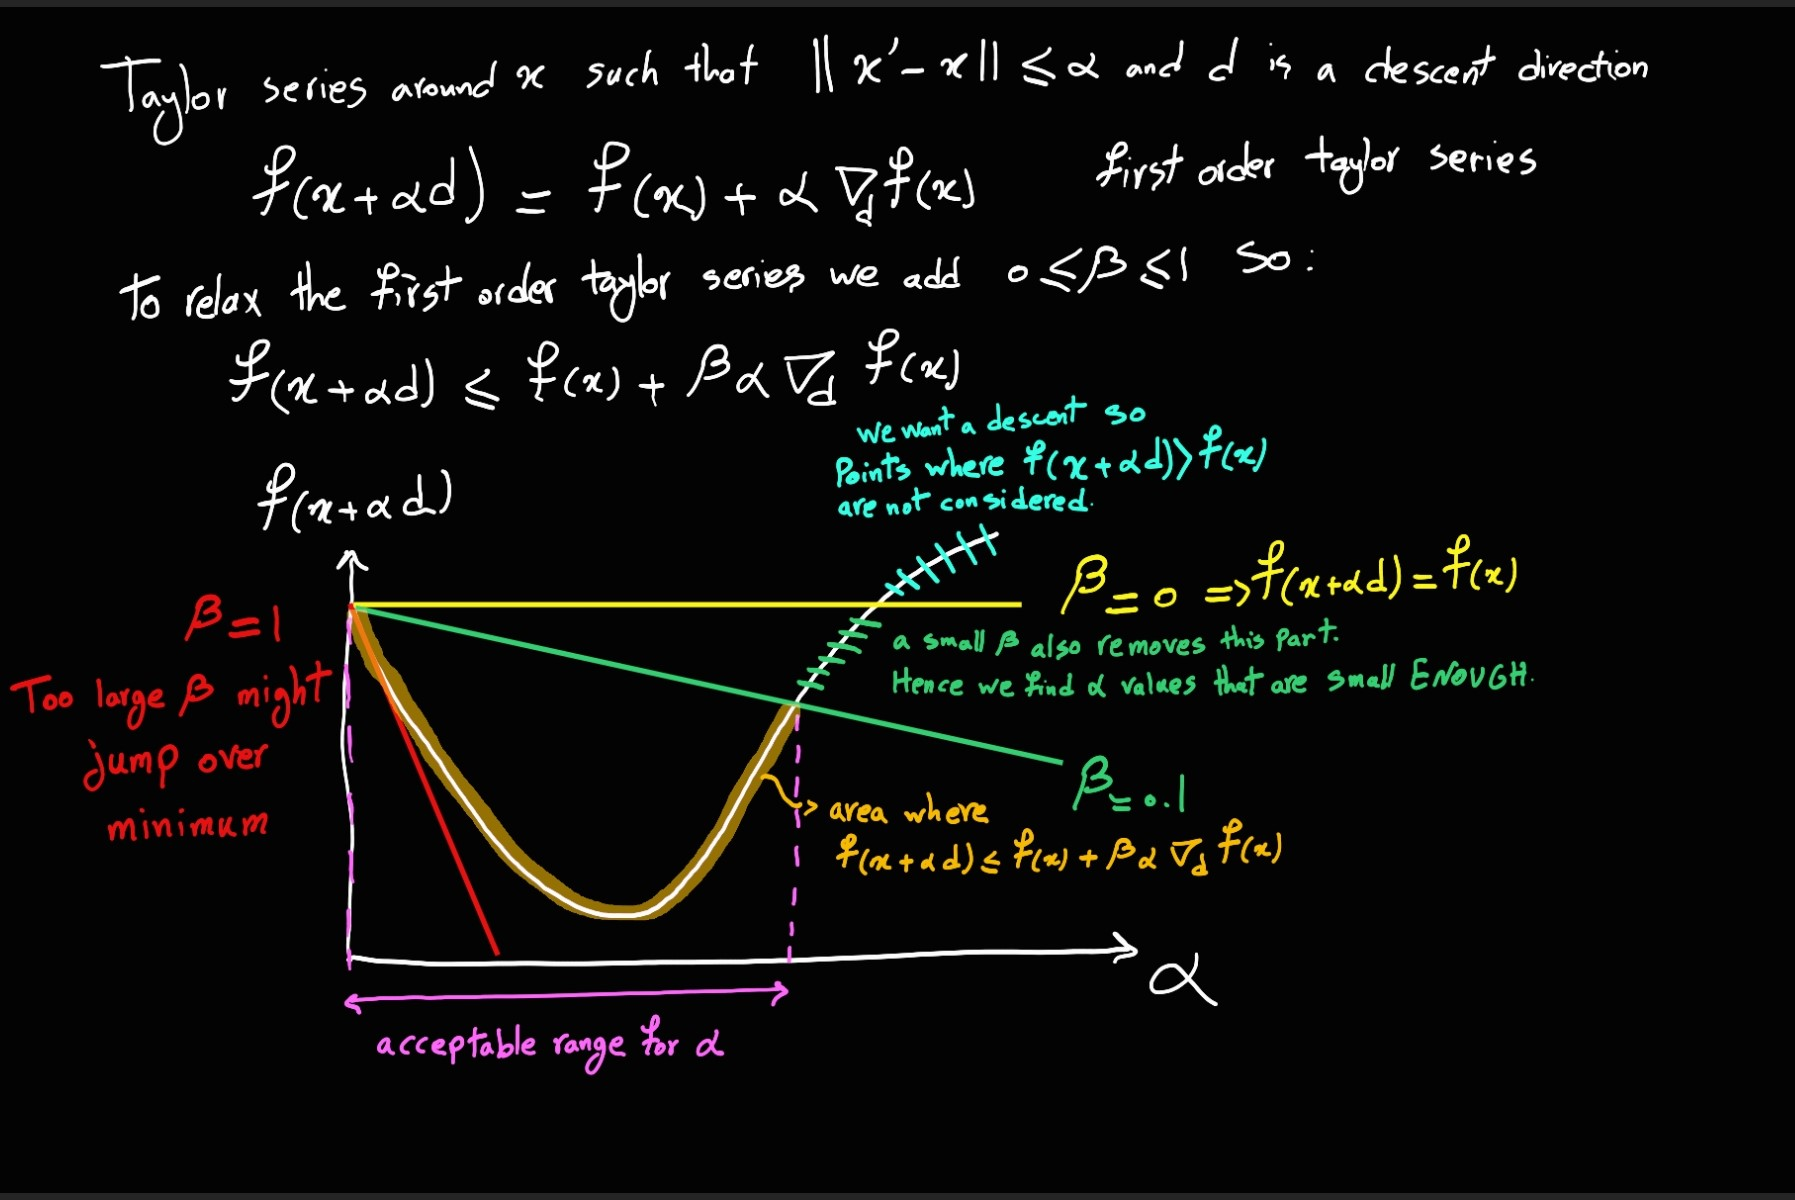

In [ ]:
def gradient_descent_with_first_wolf_condition(func, gradient_func, x_init, step_size_init, first_wolf_coef=1e-4, 
                                               update_strategy='reset', decay_rate = 0.5, growth_rate = 1.75,
                                               step_size_init_weight = 0.95, eps = 1e-6, max_iter = 200):
    '''
        func: function to be minimize
        gradient_func: gradient vector
        x_init: initial point to start optimization process from (list)
        step_size_init: initial step size value (positive)
        first_wolf_coef: constant coefficient to be used in the first wolf condition or armijo rule (0,1) typically 1e-4
        update_strategy:
            'reset':  if armijo rule is ok, reset the current step size to to step_size_init
            'growth': if armijo rule is ok, increase step size by multiplying it to growth_rate
            'mix':    if armijo rule is ok, update step size using weighted average of initial and current value such that
                      step_size = step_size_init_weight * step_size_init + (1-step_size_init_weight) * step_size
        decay_rate: if armijo rule is not ok, reduce step_size by multiplying it to the decay_rate
        growth_rate: used when update_strategy == 'growth'. ignored in other cases. growth_rate = 1 is equivalent to 
                     not changing the step_size and using the current one.
        step_size_init_weight: used when update_strategy == 'mix'. ignored in other cases.
        eps: stopping criteria for gradient value.
        max_iter: maximum number of iterations to prevent infinite loop.
    '''
    funcs = []
    
    x = np.array(x_init)       # initialize x
    funcs.append(func(x))      # store initial function value
    step_size = step_size_init # set step_size to its initial value
    
    diff = np.inf
    iteration = 0
    while diff > eps:
        
        f_x = func(x)
        grad_x = gradient_func(x)
        direction = -grad_x
        
        # new proposed value for x is x + step_size * direction. Now we have to decide whether to accept this new
        # value or not.
        while func(x + step_size * direction) > f_x + first_wolf_coef * step_size * np.dot(grad_x,direction):
            # first wolf condition(armijo rule): NOT OK => do not accept new x value and reduce the step size
            step_size = step_size * decay_rate
            
        x = x + step_size * direction  # find the new x value using the step size satisfying the armijo rule
        
        # determine the initial step size value that should be used in the beginning of the next iteration
        if update_strategy == 'reset':
            # update step_size to its initial value
            step_size = step_size_init
        elif update_strategy == 'growth':
            # update step_size by increasing it
            step_size = step_size * growth_rate 
        else: # update_strategy == 'mix'
            # update step size using weighted average of initial and current value
            step_size = step_size_init_weight*step_size_init + (1-step_size_init_weight)*step_size
        
        # store function value at the updated x
        funcs.append(func(x))
        
        # compute gradient value to see if it reached 0 (stopping criteria)
        diff = np.linalg.norm(gradient_func(x))
        
        if iteration >= max_iter:
            break # end the while loop if maximum number of iterations is reached 
        else:
            iteration += 1
    
    return x, funcs

<h3>using gradient descent with first wolf condition (armijo rule)</h3>

Alternatively known as approximate line search

In [ ]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    # return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    # return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
    #                  2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
                     2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])


x_init = [5,4]
x, funcs = gradient_descent_with_first_wolf_condition(func, gradient_func, x_init, step_size_init=2, first_wolf_coef=1e-4, 
                                                      update_strategy='growth', decay_rate = 0.5, growth_rate = 1,
                                                      step_size_init_weight = 0.95, eps = 1e-6, max_iter = 500)

print(f'Minimizer = {x}')
print(f'minimum = {func(x)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with first wolf condition | num iterations: {len(funcs)-1}') # minus one to exclude initial point
plt.grid()

<h1>***************************************</h1>

<h2>Gradient descent with first and second wolfe conditions</h2>

The first Wolfe condition (Armijo rule) ensures that we are choosing a step_size which is sufficiently small as very big step sizes move us alot further from where we currently are and we do not have information about those places. So it puts an upper bound on the step size.

The second Wolfe condition on the other hand attempts to put a lower bound on the step size and prevent the line search algorithm to return a very small step size. So it ensures that the step size is sufficiently large. In summary:

* first wolfe => sufficiently small step
* second wolfe => not too small step

How does this work is described in the following:

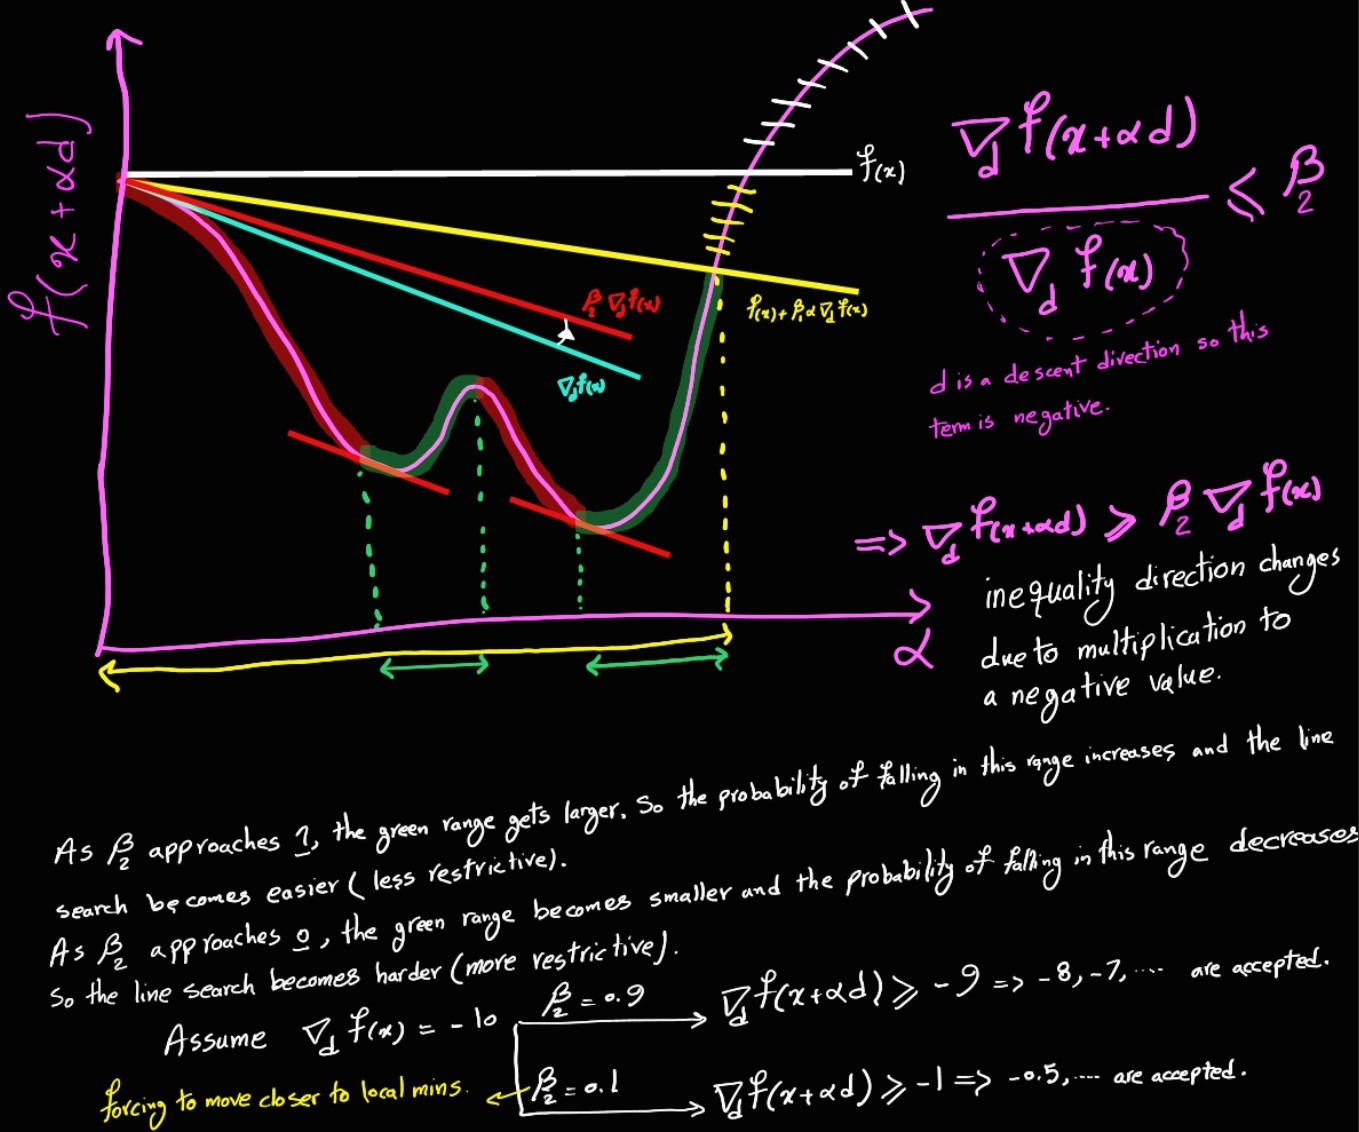

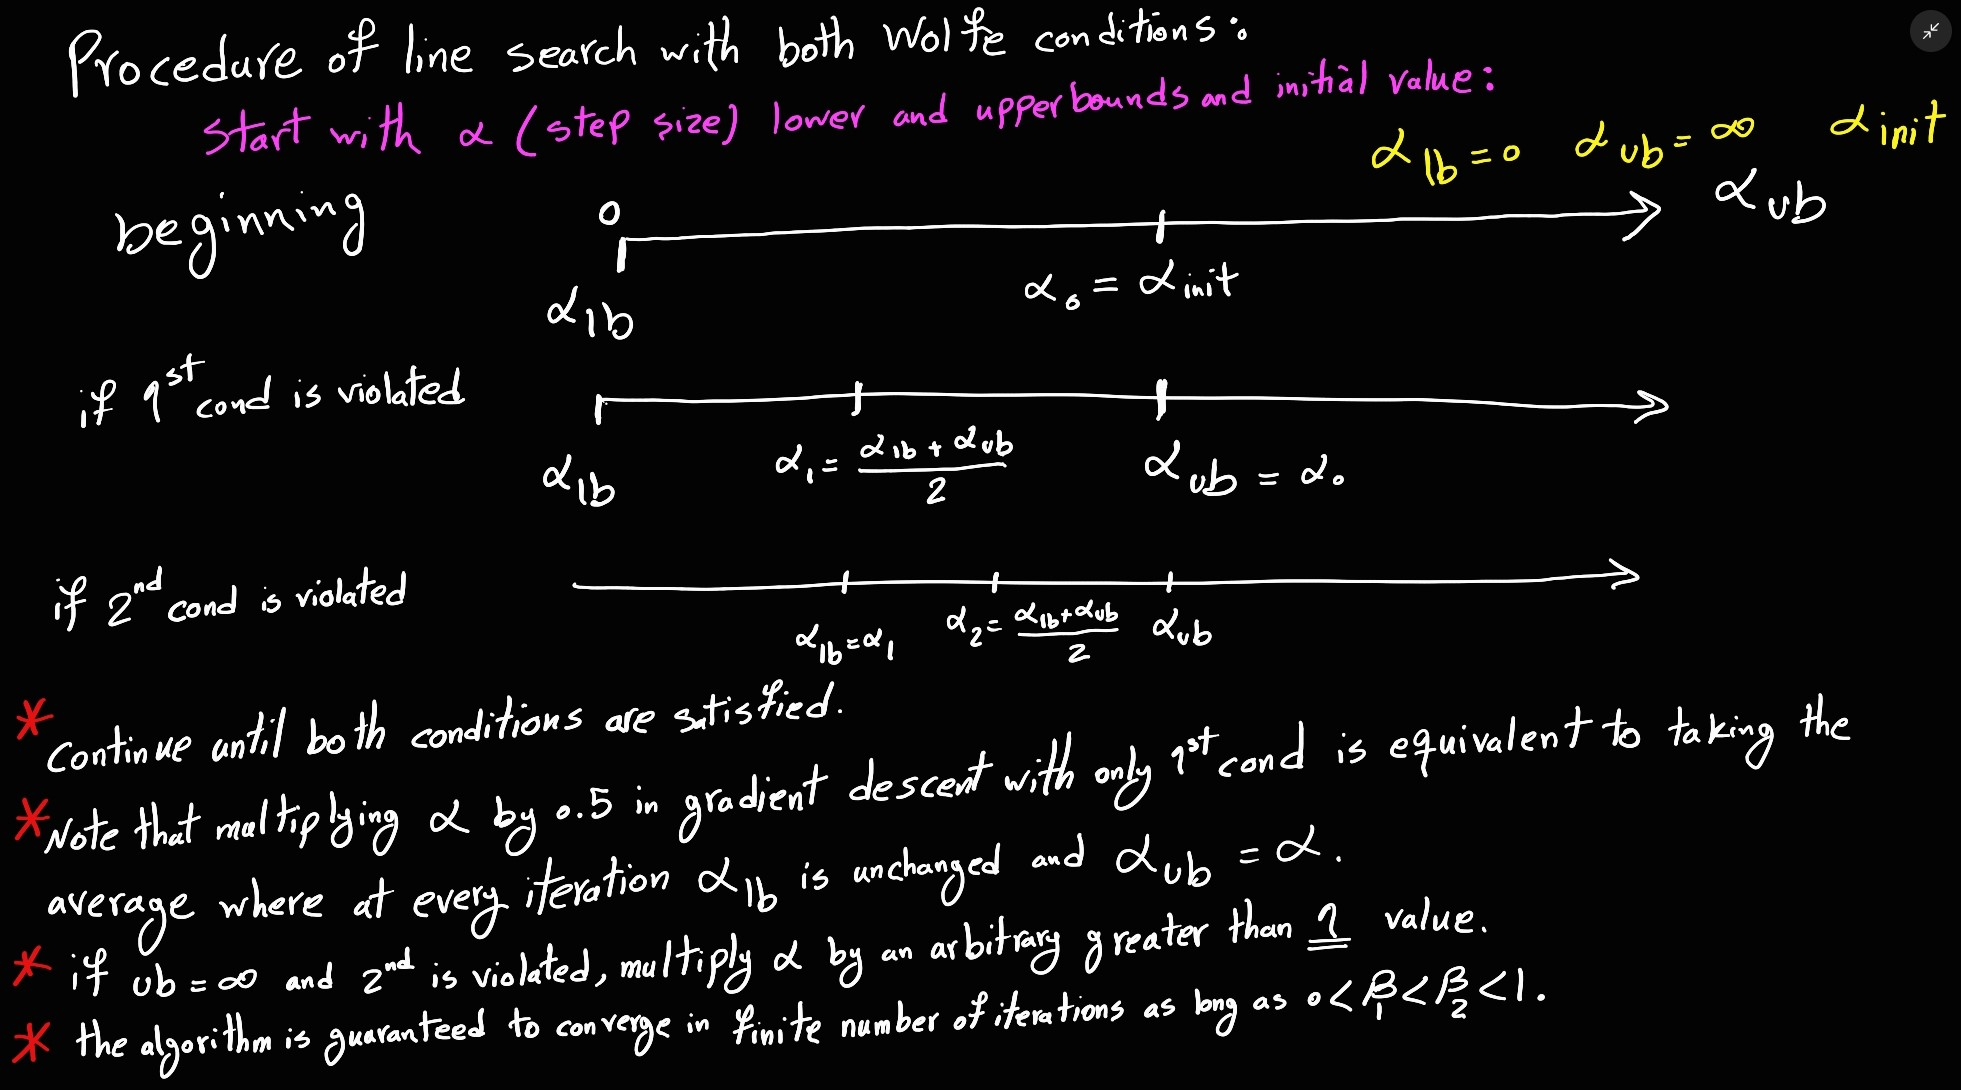

If instead of comparing directional gradient in x_new = x + step_size * d and x, we compare their absolute value, we will have strong Wolfe condition. In this case, we also reject large positive gradient values and we want to be as close as possible to local mins. So, the green range gets smaller (as shown below) and the search becomes more challenging.

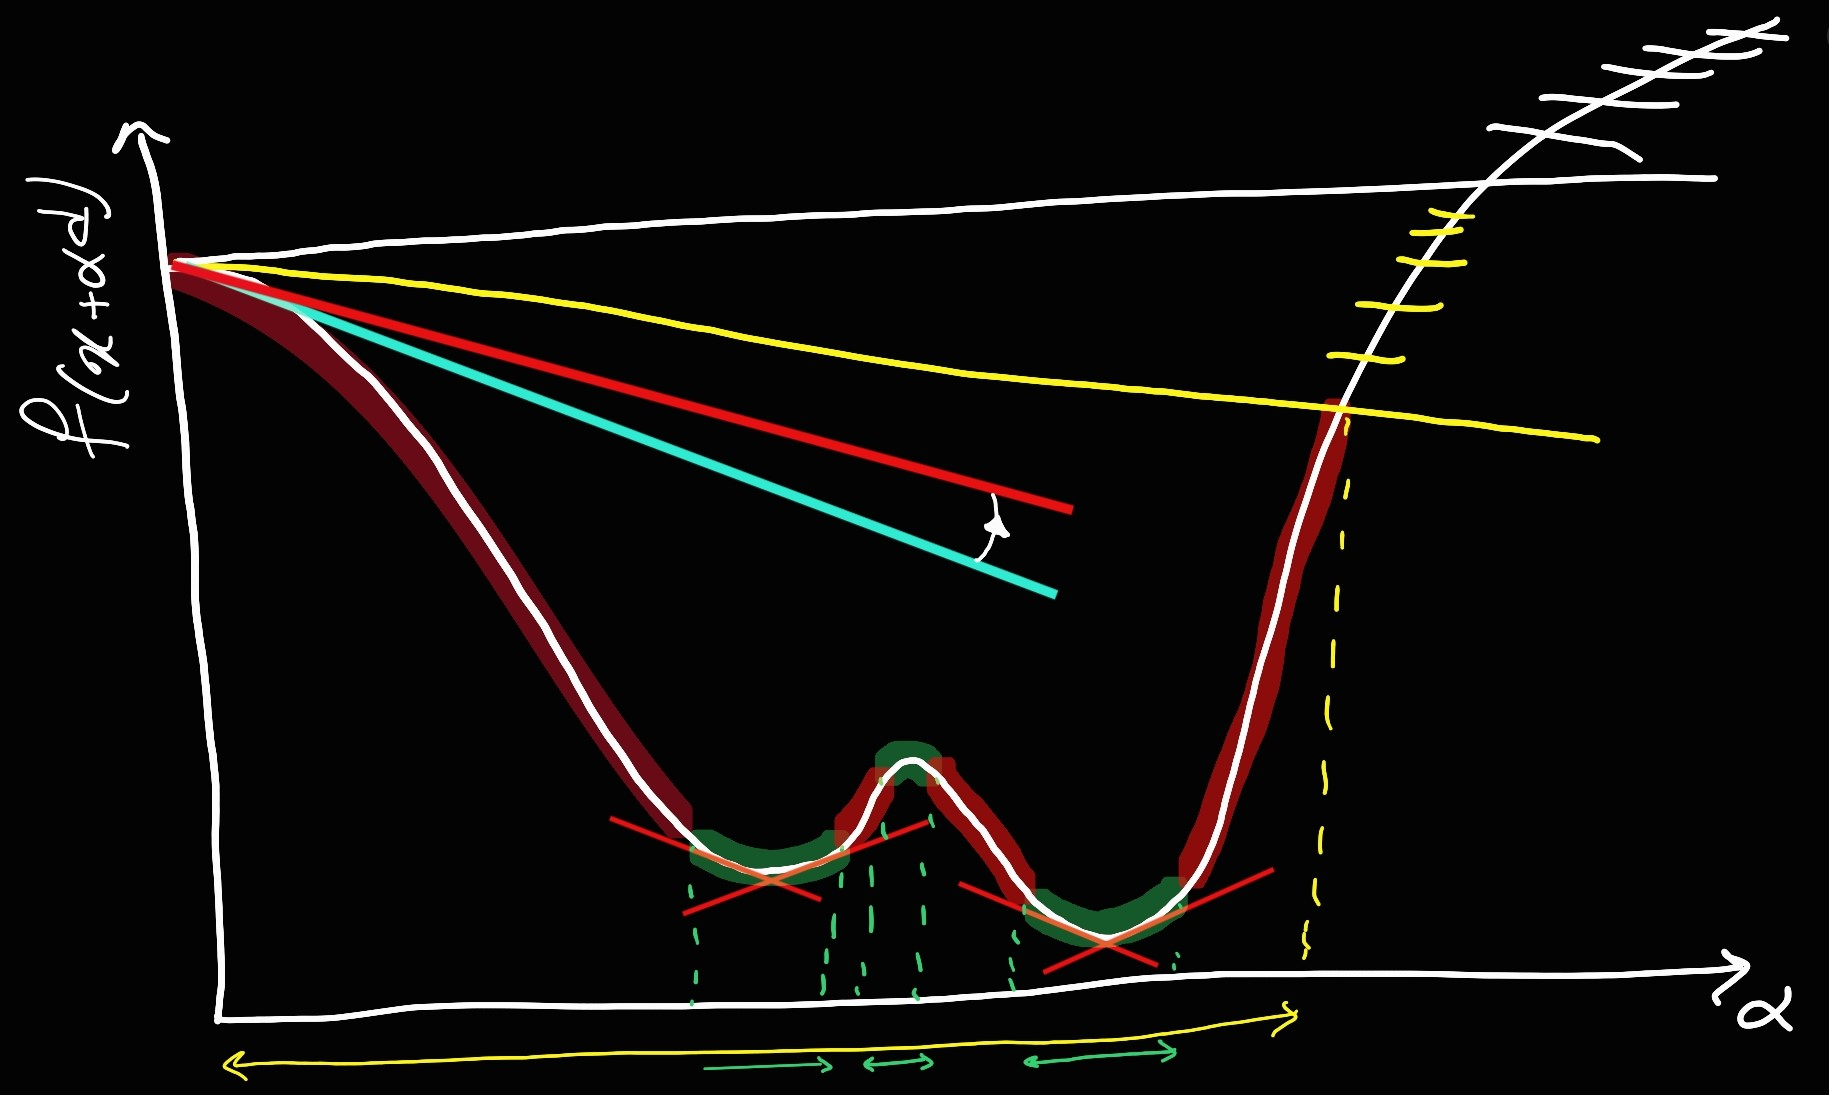

more info on the second Wolfe condition can be found in:

* https://www.youtube.com/watch?v=sXMi1D2E9QQ
* https://www.youtube.com/watch?v=5upFcYJqSwo

In [ ]:
def gradient_descent_with_wolfe_conditions(func, gradient_func, x_init, step_size_init, 
                                           first_wolf_coef=1e-4, second_wolf_coef = 0.9,
                                           update_strategy='growth',growth_rate = 1,step_size_init_weight = 0.95, 
                                           eps = 1e-6, max_iter = 200):
    '''
        func: function to be minimized.
        gradient_func: gradient of the function (should return a np array)
        x_init: initial point to start optimization process from (list)
        step_size_init: initial step size value (positive)
        first_wolf_coef: constant coefficient to be used in the first wolf condition or armijo rule (0,1) typically 1e-4
        update_strategy:
            update strategy determines how the step size is updated at the beginning of a new iteration. For instance,
            if we start by step_size = 10 and at the end of iteration one we find step_size = 0.25, we might want to use
            10 again at the beginnig of the next iteration.
            'reset':  if armijo rule is ok, reset the current step size to to step_size_init
            'growth': if armijo rule is ok, increase step size by multiplying it to step_size_increase
            'mix':    if armijo rule is ok, update step size using weighted average of initial and current value such
                      that step_size = step_size_init_weight * step_size_init + (1-step_size_init_weight) * step_size
        growth_rate:  used when update_strategy == 'growth'. ignored in other cases. growth_rate = 1 is equivalent
                      to not changing the step_size and using the current one.
        step_size_init_weight: used when update_strategy == 'mix'. ignored in other cases.
        eps: stopping criteria for gradient value.
        max_iter: maximum number of iterations to prevent infinite loop.
    '''
    funcs = []
    
    x = np.array(x_init)       # initialize x
    funcs.append(func(x))      # store initial function value
    step_size = step_size_init # set step_size to its initial value
    
    diff = np.inf
    iteration = 0
    while diff > eps:
        
        f_x = func(x)
        grad_x = gradient_func(x)
        direction = -grad_x
        
        step_size_lb = 0
        step_size_ub = np.inf
        
        for ii in range(200):
            stop_criteria = 2
            if func(x+step_size*direction) > f_x + first_wolf_coef * step_size * np.dot(grad_x,direction):
                # wolfe 1 violated
                stop_criteria = stop_criteria -1
                step_size_ub = step_size
                step_size = (step_size_ub + step_size_lb)/2
            
            # if we compare abs() values instead, it will be strong Wolfe condition
            if np.dot(gradient_func(x + step_size*direction),direction)<second_wolf_coef*np.dot(grad_x,direction) and step_size_ub == np.inf:
                # wolfe 2 violated and upperbound is still inf
                stop_criteria = stop_criteria -1
                step_size = 2*step_size
            elif np.dot(gradient_func(x + step_size*direction),direction)<second_wolf_coef*np.dot(grad_x,direction): 
                # wolfe 2 violated
                stop_criteria = stop_criteria -1
                step_size_lb = step_size
                step_size = (step_size_lb + step_size_ub)/2
                
            if stop_criteria == 2:
                break
            
#         print(f'step size: {ii, step_size}')
#         print('****************')
          
        x = x + step_size * direction  # find the new x value using the step size satisfying the armijo rule
        
        # determine the initial step size value that should be used in the beginning of the next iteration
        if update_strategy == 'reset':
            # update step_size to its initial value
            step_size = step_size_init
        elif update_strategy == 'growth':
            # update step_size by increasing it
            step_size = step_size * growth_rate
        else: # update_strategy == 'mix'
            # update step size using weighted average of initial and current value
            step_size = step_size_init_weight*step_size_init + (1-step_size_init_weight)*step_size
        
        # store function value at the updated x
        funcs.append(func(x))
        
        # compute gradient value to see if it reached 0 (stopping criteria)
        diff = np.linalg.norm(gradient_func(x))
        
        if iteration >= max_iter:
            break # end the while loop if maximum number of iterations is reached 
        else:
            iteration += 1
    
    return x, funcs

In [ ]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    # return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    # return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
    #                  2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
                     2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])


x_init = [5,4]
x, funcs = gradient_descent_with_wolfe_conditions(func, gradient_func, x_init, step_size_init=2, 
                                           first_wolf_coef=1e-4, second_wolf_coef = 0.1,
                                           update_strategy='growth',growth_rate = 1,step_size_init_weight = 0.95, 
                                           eps = 1e-6, max_iter = 500)

print(f'Minimizer = {x}')
print(f'minimum = {func(x)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with wolf conditions | num iterations: {len(funcs)-1}') # minus one to exclude initial point
plt.grid()

As can be seen the algorithm converges to the minimum in just 11 iterations which is in contrast to the implementation using only first wolfe condition (previous cell) which requires 115 iteration (for the fourth test function). This is because the second wolf condition prevents us from taking too small steps.

Also considering the third test function (which is a more challenging one), the first implementation does not converge to a satisfactory result (in 500 iterations) but the second one using both conditions finds a better answer in the same number of iterations.

Note that using 'reset' updading strategy leads to having similar results when using only first condition and when using both conditions. The true power of the second condition is revealed when we use the same step_size found in iteration i as the initial step_size of iteration i+1. This is equivalent to using 'growth' strategy with a rate of 1.

<h2>Stochastic Gradient descent with normalized or clipping gradient</h2>

In noisy functions with multiple local minimums, stochastic moves facilitate better exploration.

In [ ]:
def stochastic_gradient_descent(func,gradient_func,x_init,step_size,esp, step_decay_rate, 
                                max_iter, grad_type = 'norm', verbose= True):
    # np.random.seed(1)
    # set decay_rate to None or 1 if you want to use a constant step_size
    
    funcs = []
    x = x_init
    funcs.append(func(x))
    diff = np.inf
    iteration = 0
    while diff > esp:
        
        if iteration == max_iter:
            break
        iteration += 1
        
        y1 = func(x)
        grad_x = gradient_func(x)
        if grad_type == 'norm':
            x = x - step_size * (grad_x/np.linalg.norm(grad_x)+np.random.normal(loc = 0, scale = 0.5))
        elif grad_type == 'clip':
            x = x - step_size * np.clip(grad_x,-100,100)
        else:
            return 'invalid grad_type. acceptable values are (norm) and (clip)'
           
        y2 = func(x)
        diff = abs(y1-y2)
        funcs.append(y2)
        
        if step_decay_rate:
            step_size = step_size * step_decay_rate
        
        if verbose:
            print(f'Difference = {diff} | x = {x}')
            
    return x, funcs

In [ ]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
                     2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])


x_init = [5,4]
# for clip with func 3 use step_size=0.01 and step_decay_rate=1
# for norm with func 3 use step_size = 1 and  step_decay_rate=0.96
x, funcs = stochastic_gradient_descent(func,gradient_func,x_init,step_size=1,esp=1e-10, 
                                       step_decay_rate=0.96, grad_type='norm', max_iter=500, 
                                       verbose= False)

print(f'Minimizer = {x}')
print(f'minimum = {func(x)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with wolf conditions | num iterations: {len(funcs)-1}') # minus one to exclude initial point
plt.grid()

As can be seen, normalizing the gradient vector assist in the numerical stability of the gradient descent algorithm. It can be seen that using this method, the minimum of the third function which is a more challenging one is obtained whereas the classic gradient descent could not find the minimum due to numerical overflow resulting from very large gradient values. However, it increases the number of iterations required to find a minimum. Also, the impact of random noise term added to the gradient value is clear as each time the code is executed, the convergence occures in a different number of iterations. This means that in some cases, the random noise is helful in better exploration.

To do:

* unify the graphs
* unify the notations (for some algs a,b are used while for the others L,R and xL,xU)
* add different stopping criteria
* develop a master function for gradient descent combining all the features discussed so far:
    * simple gradient descent
    * with first Wolfe condition
    * with both Wolfe conditions
    * optimum step size
    * hyper-gradient descent
    * normalized gradient descent
    * gradient descent with clipping
    * stochastic gradeint descent

<h2>Gradient descent with simple momentum</h2>

momentum helps scaping from areas where gradient is close to zero and updates are very small. A high number of iterations is required to scape from these flat areas of the funciton space. Momentum helps reducing the number of iterations required to leave these areas.

In [2]:
def simple_momentum_gradient_descent(func,gradient_func,x_init,step_size,momentum_decay,
                                     esp,decay_rate,max_iter,verbose= True):
    
    # set decay_rate to None if you want to use a constant step_size
    # momentum_decay is a number in the range of [0,1). 0 gives simple gradient descent
    
    funcs = []
    x = x_init
    funcs.append(func(x))
    diff = np.inf
    iteration = 0
    m = 0 # initial momentum
    while diff > esp:
        
        if iteration == max_iter:
            break
        iteration += 1
        
        y1 = func(x)
        m = momentum_decay * m - step_size*gradient_func(x)
        x = x + m
        y2 = func(x)
        diff = abs(y1-y2)
        funcs.append(y2)
        
        if decay_rate:
            step_size = step_size * decay_rate
        
        if verbose:
            print(f'Difference = {diff} | x = {x}')
            
    return x, funcs

Minimizer = [0.99998542 3.00118798]
minimum = 6.918967641397608e-06


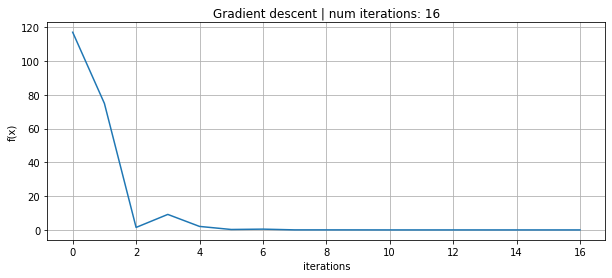

In [70]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    # return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    # return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
    #                  2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
                     2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])

x_init = [5,4]
step_size = 0.1
momentum_decay = 0.35
esp = 1e-6
decay_rate = 1
max_iter = 500
minimizer, funcs = simple_momentum_gradient_descent(func,gradient_func,x_init,step_size,momentum_decay,
                                                    esp,decay_rate,max_iter,verbose= False)

print(f'Minimizer = {minimizer}')
print(f'minimum = {func(minimizer)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent | num iterations: {len(funcs)-1}')
plt.grid()

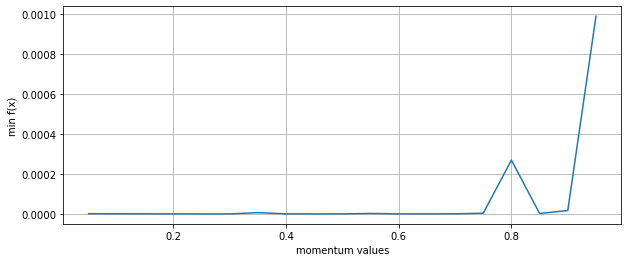

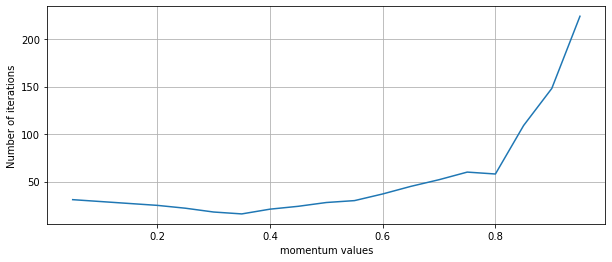

In [69]:
Num_iterations = []
func_vals = []
for momentum_decay in np.linspace(0.05,0.95,19):

    minimizer, funcs = simple_momentum_gradient_descent(func,gradient_func,x_init,step_size,momentum_decay,
                                                        esp,decay_rate,max_iter,verbose= False)
    func_vals.append(func(minimizer))
    Num_iterations.append(len(funcs)-1)
    
plt.figure(figsize=(10,4))
plt.plot(np.linspace(0.05,0.95,19), func_vals)
plt.xlabel('momentum values')
plt.ylabel('min f(x)')
plt.grid()

plt.figure(figsize=(10,4))
plt.plot(np.linspace(0.05,0.95,19), Num_iterations)
plt.xlabel('momentum values')
plt.ylabel('Number of iterations')
plt.grid()

in the above implementation we used a constant momentum_decay coefficient. But this value can be changed in every iteration similar to the step size. Generally, at the beginning we use a small momentum value since the gradients are very large. Then as we move forward and gradient become smaller, we can increase the momentum decay and make it closer to 1.